# 🤖 Backtesting Machine Learning-Based Strategies with PyNance

This notebook demonstrates how to use the `PyNance` package for creating and evaluating machine learning-driven trading strategies.

In this notebook, you will:

- 🧠 Build and train predictive models (e.g., Linear Regression) on historical market data  
- 🕵️‍♂️ Use lagged features to forecast future returns  
- 🔁 Generate trading signals based on model predictions  
- 📊 Backtest and analyze strategy performance with key metrics (Sharpe Ratio, Profit Factor, etc.)

---

📦 **PyNance** makes it easy to prototype and test both **technical indicator** and **machine learning-based** strategies with a consistent interface and extensible design.

Let’s dive into ML-powered trading!

---

In [9]:
# Import packages
from pynance import LRStrategy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

## 📉 Linear Regression Strategy

In this section, we implement a **Linear Regression-based trading strategy** using the PyNance framework.

The idea is to:

- Use **lagged log returns** as features to predict future returns
- Train a **Linear Regression model** on historical data
- Generate trading signals based on the predicted return direction
- Backtest the strategy and evaluate its performance using key metrics

This approach demonstrates how simple machine learning models can be used for financial forecasting and signal generation.


In [10]:
# Set the chosen ticker and duration of historical data
period='1y'
interval='1d'
ticker='AAPL'
cost_pct = 0.001 # Transaction cost modelled as a percentage of the trade cost

/home/tm1724/Algorithmic-Trading/PyNance/pynance/base.py:96: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


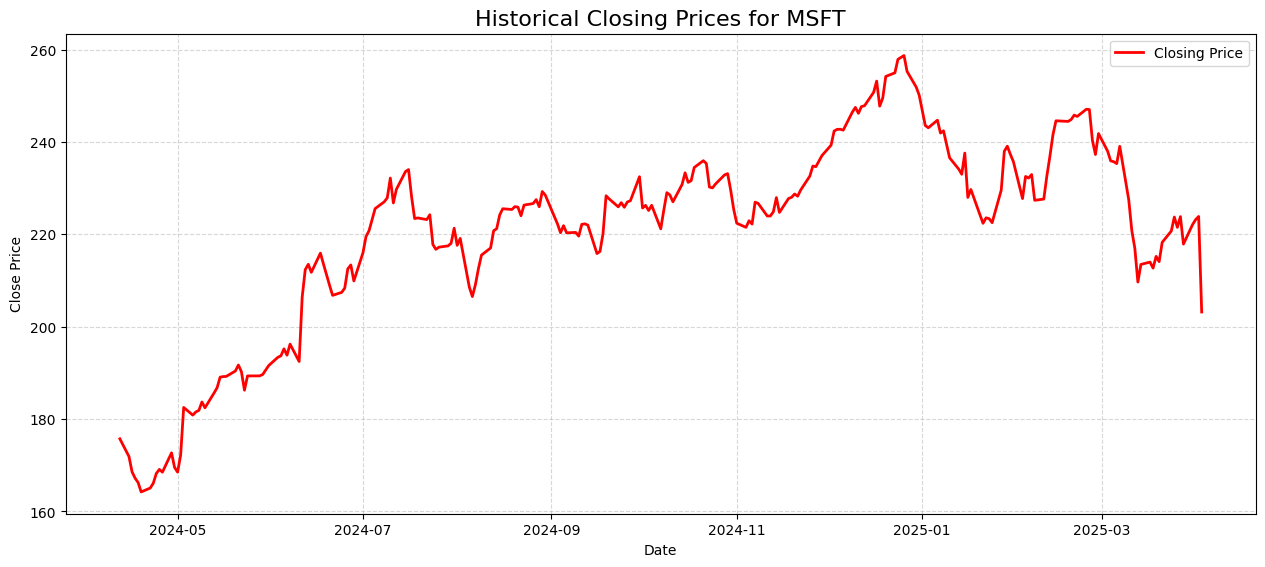

In [11]:
# Pull historical data from yfinance
data = yf.Ticker(ticker).history(period, interval)

# Instantiate Linear Regression strategy object

lags = 5 # Set the number of lags for linear regression to be calculated on
lr_strat = LRStrategy(data, period, interval, lags)
lr_strat.plot_close(f'Historical Closing Prices for MSFT')

Metric                   Value
----------------------------------------
Percentage Return        99.37%
Win Rate                 56.97%
Average Gain             1.2342%
Average Loss             -0.9726%
Profit Factor            0.35
Sharpe Ratio             2.83
Volatility (Ann)         23.35%
Max Drawdown             17.78%
Trade Count              245


/home/tm1724/Algorithmic-Trading/PyNance/pynance/base.py:134: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


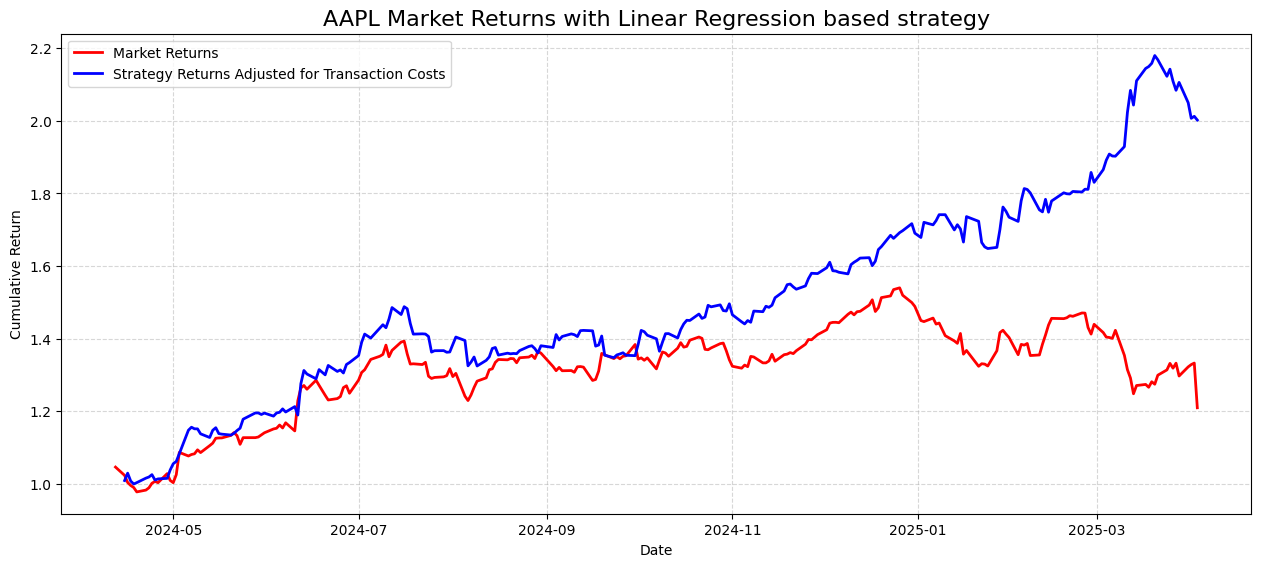

/home/tm1724/Algorithmic-Trading/PyNance/pynance/base.py:171: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


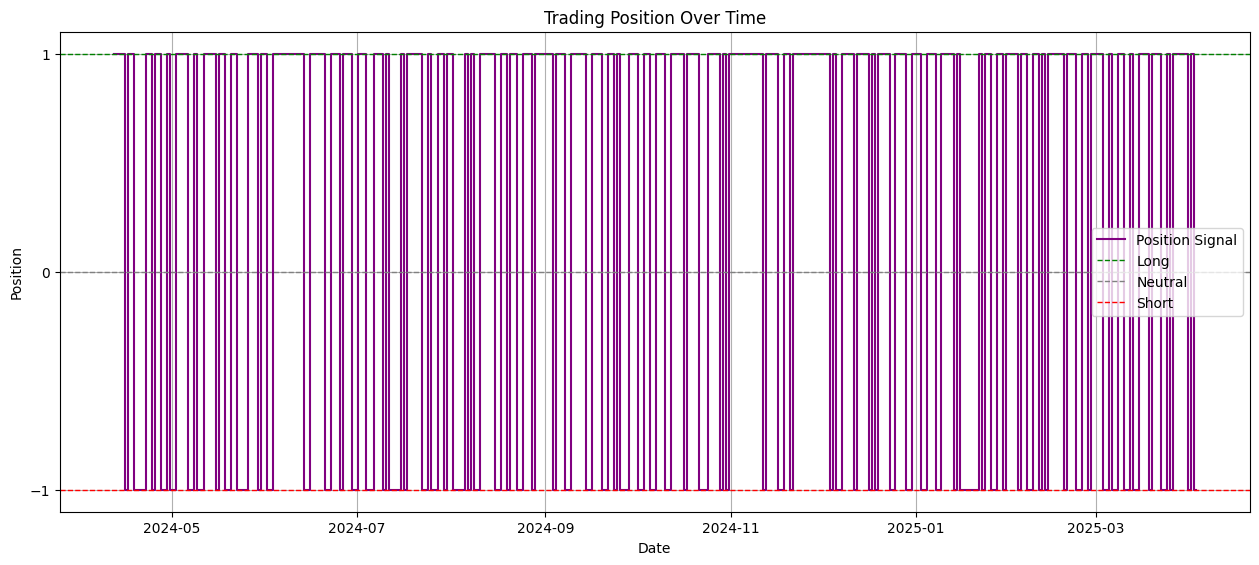

In [12]:
# Backtest the strategy on the data
lr_strat.back_test(cost_pct)

# Plot the results and signals
lr_strat.plot_returns(f'{ticker} Market Returns with Linear Regression based strategy')
lr_strat.plot_signals()